In [1]:
#路透社多酚类问题

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#构建数据，涉及到one-hot型矩阵的构建

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #创建一个形状为(len(sequences), dimension)的零矩阵
    for i,sequence in enumerate(sequences):
        results[i, sequence] = 1 #将results[i]的指定索引设为1,即升维后，将有单词对应索引的数字作为索引，该位置的值设为1
    return results

#将训练和测试数据向量化
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [3]:
#标签向量化，使用one-hot编码
#这次使用keras自带的方法，也可以用上面的函数构造

from keras.utils.np_utils import to_categorical

one_hot_train_label = to_categorical(train_labels)
one_hot_test_label = to_categorical(test_labels)

In [5]:
#训练模型

from keras import models
from keras.layers import Dense, Activation

model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
#model.add(Dense(46))
#model.add(Activation('softmax'))
          
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
          
x_val = x_train[:1000]
p_x_train = x_train[1000:]

y_val = one_hot_train_label[:1000]
p_y_train = one_hot_train_label[1000:]

history = model.fit(
    p_x_train,
    p_y_train,
    epochs=20, #样本训练20次
    batch_size=512, #每批次样本数量
    validation_data=(x_val,y_val)
)


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 144us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 103us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 105us/step - loss: 0.6598 - acc: 0.8638 - val_loss: 0.9692 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 103us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.4291 - acc: 0.9116 - val_loss: 0.9103 - val_acc: 0.8030


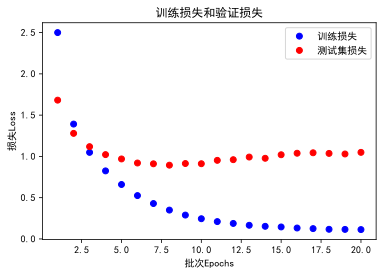

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg' #画的图更清晰

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'bo',label='训练损失') #bo是蓝色圆点
plt.plot(epochs, val_loss_values,'ro',label='测试集损失') 
plt.title('训练损失和验证损失')
plt.xlabel('批次Epochs')
plt.ylabel('损失Loss')
plt.legend()
plt.show()

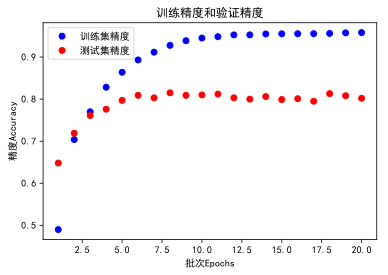

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, acc,'bo',label='训练集精度') #bo是蓝色圆点
plt.plot(epochs, val_acc,'ro',label='测试集精度') #ro是红色点
plt.title('训练精度和验证精度')
plt.xlabel('批次Epochs')
plt.ylabel('精度Accuracy')
plt.legend()
plt.show()

In [11]:
#根据训练集中的训练结果，重新对整个数据测试

from keras import models
from keras.layers import Dense, Activation

model = models.Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
#model.add(Dense(46))
#model.add(Activation('softmax'))
          
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
          
x_val = x_train[:1000]
p_x_train = x_train[1000:]

y_val = one_hot_train_label[:1000]
p_y_train = one_hot_train_label[1000:]

model.fit(
    x_train,
    one_hot_train_label,
    epochs=9, #样本训练20次
    batch_size=512, #每批次样本数量
)
results = model.evaluate(x_test, one_hot_test_label) #损失率loss, 精度accuracy
results

Epoch 1/9
8982/8982 [==============================] - 1s 122us/step - loss: 2.6673 - acc: 0.5235
Epoch 2/9
8982/8982 [==============================] - 1s 99us/step - loss: 1.4144 - acc: 0.7130
Epoch 3/9
8982/8982 [==============================] - 1s 97us/step - loss: 1.0430 - acc: 0.7833
Epoch 4/9
8982/8982 [==============================] - 1s 100us/step - loss: 0.8230 - acc: 0.8271
Epoch 5/9
8982/8982 [==============================] - 1s 101us/step - loss: 0.6562 - acc: 0.8582
Epoch 6/9
8982/8982 [==============================] - 1s 95us/step - loss: 0.5290 - acc: 0.8852
Epoch 7/9
8982/8982 [==============================] - 1s 96us/step - loss: 0.4233 - acc: 0.9112
Epoch 8/9
8982/8982 [==============================] - 1s 95us/step - loss: 0.3473 - acc: 0.9280
Epoch 9/9
2246/2246 [==============================] - 0s 139us/step


[0.947765577508208, 0.7943009794660689]

In [13]:
predictions = model.predict(x_test)
predictions

array([[2.0977046e-04, 1.0429887e-04, 5.5980145e-06, ..., 3.8088176e-05,
        7.7432310e-07, 4.7054850e-06],
       [2.7060425e-03, 3.9167345e-02, 2.6823517e-02, ..., 1.6937817e-04,
        8.4346408e-05, 1.8091539e-05],
       [1.5686142e-03, 8.5592484e-01, 1.6444197e-02, ..., 5.7015030e-05,
        1.4186460e-04, 2.1418197e-04],
       ...,
       [1.2297755e-04, 1.3079387e-04, 1.3263057e-05, ..., 1.1405992e-05,
        1.8696159e-06, 1.7313818e-05],
       [6.3749216e-03, 5.4377601e-02, 2.9479519e-03, ..., 6.3782634e-04,
        2.0762894e-04, 1.9136935e-03],
       [1.7538191e-03, 1.8783940e-01, 1.2113270e-01, ..., 8.8295655e-04,
        2.0621570e-04, 9.9986233e-04]], dtype=float32)

In [16]:
label_l = []
for i in predictions:
    label_p = np.argmax(i)#取每个新闻的分类的概率最大值的序号
    label_l.append(label_p)
    
label_l[0]

3

In [22]:
#print(type(train_data))
print(train_data.shape)
print(train_data)
#print(train_data[0])

(8982,)
[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90,